# Exercise 3.1 - Multi-Class Classification
In this exercise, we extend our implementation of logistic regression to a one-vs-all classification application.

First, import necessary packages:

In [1]:
#%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt

from scipy.io import loadmat

First let's setup the parameters to be used for this part of the exercise

In [2]:
input_layer_size = 20*20        # 20x20 Input Images of Digits
num_labels = 10                 # 10 labels from 1 to 10 (note: we have mapped "0" to 10)

Now let's load and examine the training data

(-0.5, 399.5, 19.5, -0.5)

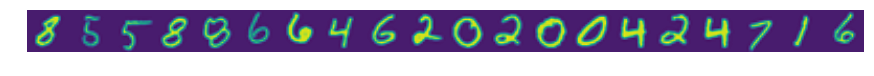

In [3]:
path = os.path.join(os.getcwd(), 'data', 'ex3data1.mat')
data = loadmat(path)
y = data['y']
X = data['X']

# Choose a random sample of data to display
sample = X[np.random.choice(X.shape[0], 20)]
plt.figure(figsize=(15,15))
plt.imshow(sample.reshape(-1, 20).T, interpolation='bilinear')
plt.axis('off')

The dataset is a sample of handwritten digits from the MNIST dataset.

As in the previous exercises, we need to add a column of 1s to the feature vectors for the intercept

In [4]:
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]
print(X.shape, y.shape)

(5000, 401) (5000, 1)


The dataset consists of 5000 training examples where each example is a row in the $X$ matrix. Each row is a feature vector that consists of each of the pixels in each image stretched into a vector. The label vector $y$ contains integers from 1 to 10 where the digits 1-9 are labelled 1-9 and the digit 0 is labelled as 10.

## Vectorising Logistic Regression
First, we define the sigmoid function:

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The regularised cost function in logistic regression is given by:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}\text{log}(h_\theta(x^{(i)})) - (1-y^{(i)})\text{log}(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

The question asks for us to vectorise our implementation of the cost function however in the previous section, we already achieved this while integrating regularisation so nothing needs to change.

In [6]:
def lrCostFunctionReg(theta, X, y, lambd):
    """ Compute the cost for regularised logistic regression """
    
    # Compute cost
    m = y.size
    n = theta.size
    theta = np.matrix(theta)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T))) 
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lambd/2*m) * np.sum(theta[:, 1:n])
    J = (np.sum(first - second) / m) + reg
    
    return J

Now we adapt the gradient function to a vectorised implementation. The vectorised equation for the gradient is:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}X^T(h_\theta(x^{(i)}) - y^{(i)}) + \frac{\lambda}{m}\theta_j $$

Note that the regularisation term does not apply to the bias term $\theta_0$.

In [7]:
def lrGradientReg(theta, X, y, lambd):
    "Compute the gradient for a single step of regularised logistic regression"
    m = y.size
    n = theta.size
    theta = np.matrix(theta)
    
    error = sigmoid(X * theta.T) - y
    grad = X.T * error
    grad = grad.T + (lambd/m)*np.concatenate((np.matrix(0), theta[:,1:]), axis=1)
    return np.array(grad).ravel()

## One-vs-all Classification
To train a multi-class logistic regressor, we implement one-vs-all classification by training multiple regularised logistic regressors - one for each class $K$.

In [8]:
def oneVsAll(X, y, num_labels, lambd):
    m = X.shape[0]
    n = X.shape[1]
    all_theta = np.zeros((num_labels,n))
    
    
    result = opt.fmin_tnc(func=costFunctionReg, x0=theta, fprime=gradientReg, args=(X, y, learning_rate))


In [14]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.zeros(X.shape[1])
theta = np.matrix(theta)

m = X.shape[0]
n = X.shape[1]
all_theta = np.zeros((num_labels,n))


(10, 401)